In [1]:
import gensim
print('start')
model = gensim.models.KeyedVectors.load_word2vec_format(r'G:\研一\www\GoogleNews-vectors-negative300.bin', binary=True)

start


In [2]:
def editDistance(in_string, target):
    m = len(in_string)
    n = len(target)
    if m == 0:
        return n
    if n == 0:
        return m
    dp = [[ 0 for j in range(m+1)] for i in range(n+1)]
    for j in range(m+1):
        dp[0][j] = j
    for i in range(n+1):
        dp[i][0] = i
    for i in range(1,n+1):
        for j in range(1,m+1):
            t = 0 if in_string[j-1] == target[i-1] else 1
            dp[i][j] = min(dp[i-1][j-1]+t,dp[i-1][j]+1,dp[i][j-1]+1)
    return dp[n][m]

s1 = 'Manu_Ginobili'
s2 = 'Andrew_Wiggins'
print(editDistance(s1,s2))

12


In [3]:
def format_entity(entity):
    entity.replace('\'',' ')
    return entity.replace(' ','_')

In [4]:

print('stop')
word1 = 'LeBron James'
word2 = 'Dwyane Wade'
word1 = format_entity(word1)
word2 = format_entity(word2)
sim = model.similarity(word1,word2)
print(sim)


stop
0.81640404


In [5]:
import pandas as pd
import numpy as np
data = pd.read_table(r'G:\研一\www\nba.txt',header=None,encoding='utf-8',sep='\t')
print(data.columns)
print(data)

Int64Index([0], dtype='int64')
                 0
0     Rick Adelman
1     Red Auerbach
2      Larry Brown
3    Mike D'Antoni
4     Phil Jackson
..             ...
67   Dennis Rodman
68   Manu Ginobili
69       John Wall
70  Andre Iguodala
71      Larry Bird

[72 rows x 1 columns]


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57']


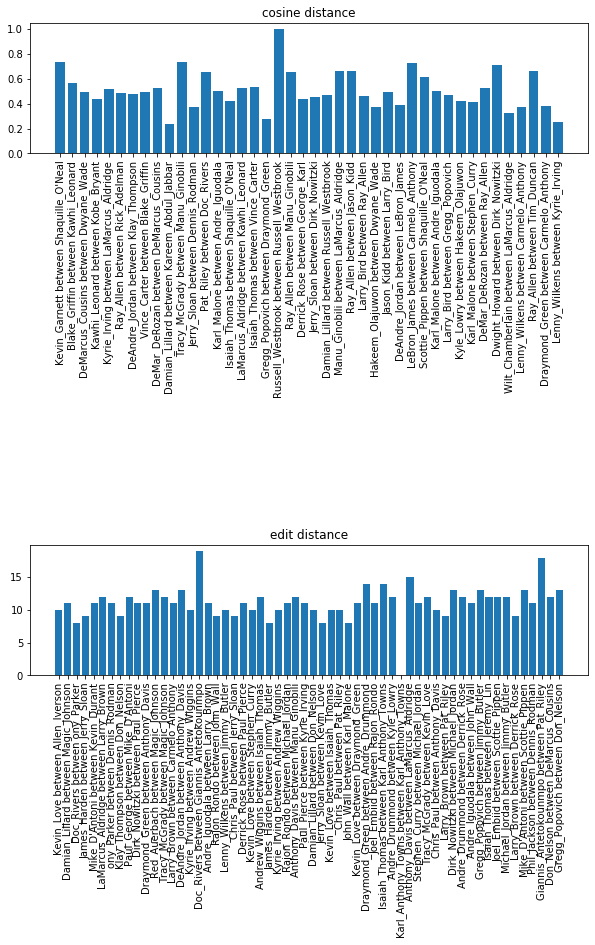

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_table(r'G:\研一\www\nba.txt',header=None,encoding='utf-8',sep='\t')
def random_get_two_entity():
    length = len(data)
    first = np.random.randint(0,length)
    second = np.random.randint(0,length)
    first_entity = data.loc[first,0]
    second_entity = data.loc[second,0]
    first_entity = format_entity(first_entity)
    second_entity = format_entity(second_entity)
    return first_entity,second_entity

num_epoch = 100
x1_set=[]
y1_set=[]
x1_labels = []
x2_set=[]
y2_set=[]
x2_labels = []
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(10,12))
count1=0
count2=0
for epoch in range(num_epoch):
    entity_1, entity_2 = random_get_two_entity()
    if entity_1 in model and entity_2 in model:
        sim = model.similarity(entity_1,entity_2)
        x1_set.append(str(count1))
        y1_set.append(sim)
        x1_labels.append(entity_1+ " between "+entity_2)
        count1 += 1

        #print(f'{entity_1} between {entity_2} cosine distance is {sim}')
    else:
        edit_sim = editDistance(entity_1,entity_2)
        x2_set.append(str(count2))
        y2_set.append(edit_sim)
        x2_labels.append(entity_1+ " between "+entity_2)
        count2 += 1
        #print(f'{entity_1} between {entity_2} edit distance is {edit_sim}')
print(x2_set)
bar1 = axes[0].bar(x = x1_set, height = y1_set,tick_label = x1_labels)
axes[0].set_xticklabels(x1_labels,rotation=90)
axes[0].set(title='cosine distance')
bar2 = axes[1].bar(x = x2_set, height = y2_set, tick_label = x2_labels)
axes[1].set(title='edit distance')
axes[1].set_xticklabels(x2_labels,rotation=90)
fig.subplots_adjust(hspace=3)
plt.savefig('result.png')
plt.show()